
# Data Visualization with Matplotlib - Exercises 2

จงทำตามคำสั่งต่อไปนี้ด้วย data ที่กำหนดให้ต่อไปนี้


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## อ่านไฟล์ Superstore.csv

In [4]:
df = pd.read_csv('Superstore.csv',encoding = 'iso-8859-1')

In [5]:
df.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Segment        9994 non-null   object 
 3   Day            9994 non-null   int64  
 4   Month          9994 non-null   int64  
 5   Year           9994 non-null   int64  
 6   Ship Mode      9994 non-null   object 
 7   City           9994 non-null   object 
 8   State          9994 non-null   object 
 9   Category       9994 non-null   object 
 10  Sub-Category   9994 non-null   object 
 11  Product Name   9994 non-null   object 
 12  Sales          9994 non-null   float64
 13  Quantity       9994 non-null   int64  
 14  Discount       9994 non-null   float64
 15  Profit         9994 non-null   float64
dtypes: float64(3), int64(4), object(9)
memory usage: 1.2+ MB


## Exercise 1

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 และตกแต่งให้สวยงาม


In [36]:
df1 = df.groupby('Year')['Profit'].sum()
x = df1.index
y = df1

<function matplotlib.pyplot.show(close=None, block=None)>

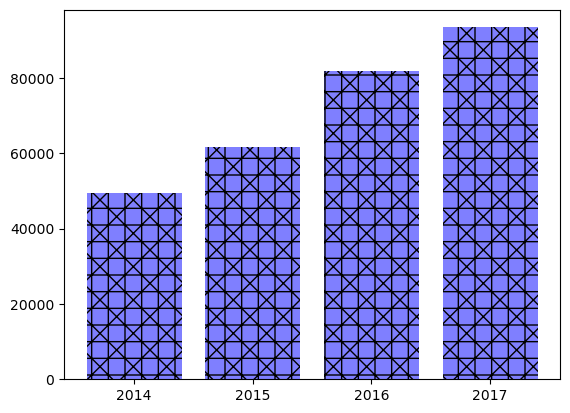

In [93]:
plt.bar(x,y,color = 'b',alpha = 0.5,hatch = '\/-|')
plt.xticks([2014,2015,2016,2017])
plt.show

## Exercise 2

จงวาดกราฟแท่งแสดงรายได้ของปี 2014 - 2017 ในกราฟเดียวแยกตามหมวดหมู่ พร้อมตกแต่งให้สวยงาม

In [118]:
arr_df = {}
for i in range(0,df['Category'].nunique()) :
    arr_df[df['Category'].unique()[i]] = df[ df['Category'] == df['Category'].unique()[i] ].groupby('Year').sum()['Profit']

In [119]:
x = np.array([2014, 2015, 2016, 2017])
y1 = arr_df['Furniture']
y2 = arr_df['Office Supplies']
y3 = arr_df['Technology']

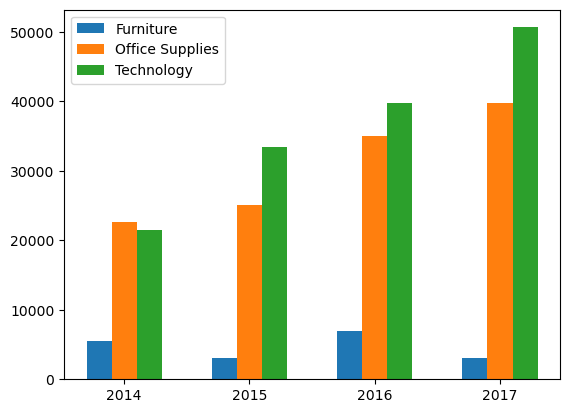

In [120]:
bw =0.2
plt.bar(x-bw,y1,width=bw,label='Furniture')
plt.bar(x,y2,width=bw,label='Office Supplies')
plt.bar(x+bw,y3,width=bw,label='Technology')

plt.yticks(np.arange(0,60000,10000))
plt.xticks(x,[2014,2015,2016,2017])
plt.legend(loc ='best')
plt.show()

## Exercise 3

จงวาดกราฟวงกลม แสดงเปอร์เซ็นต์การขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

In [100]:
df.groupby('Order ID')['Ship Mode'].unique().value_counts()

Ship Mode
[Standard Class]    2994
[Second Class]       964
[First Class]        787
[Same Day]           264
Name: count, dtype: int64

In [101]:
data = df.groupby('Order ID')['Ship Mode'].unique().value_counts()
lb = ['Standard Class', 'Second Class', 'First Class', 'Same Day']

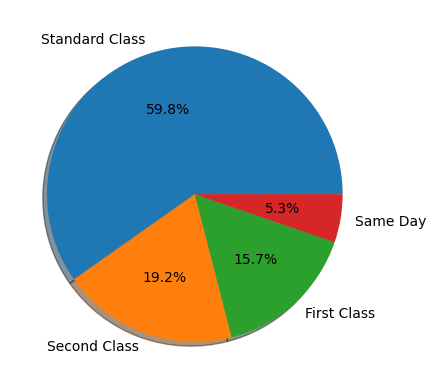

In [102]:
plt.pie(ship_counts, labels=ship_modes,shadow = True, autopct = "%.1f%%")
plt.show()

## Exercise 4

จงวาดกราฟความถี่ แสดงจำนวนการขนส่งแต่ละแบบ ( Ship Mode ) พร้อมตกแต่งให้สวยงาม

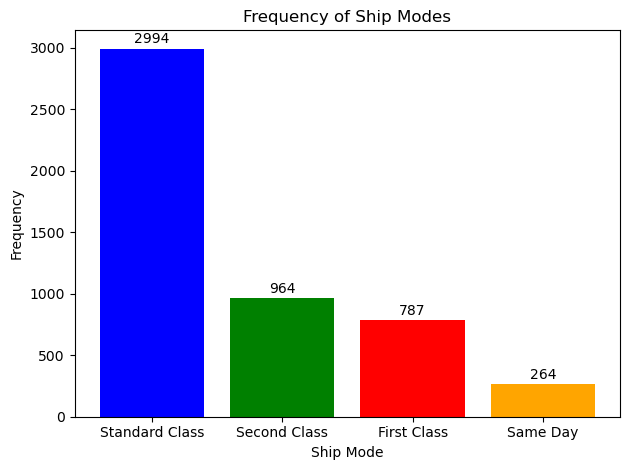

In [113]:
plt.bar(ship_modes, ship_counts, color=['b', 'g', 'red', 'orange'])

plt.title('Frequency of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')

for i, count in enumerate(ship_counts):
    plt.text(i, count + 20, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Exercise 5

จงวาดกราฟจุด(Scatter) แสดงราคาขายกับกำไรที่ได้ (Sales , Profit) พร้อมตกแต่งให้สวยงาม

<function matplotlib.pyplot.show(close=None, block=None)>

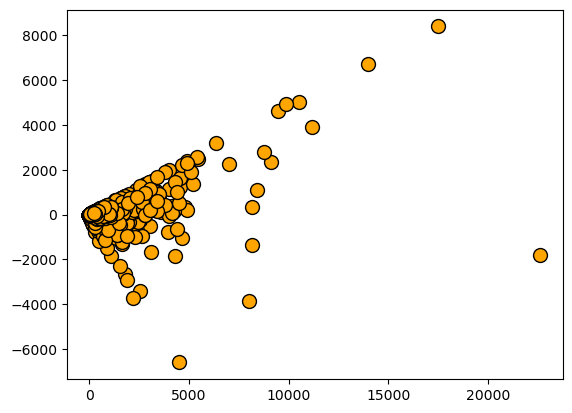

In [114]:
x = df['Sales']
y = df['Profit']

plt.scatter(x,y,marker = 'o',c = 'orange',s = 100,ec = 'k',lw = 1)
plt.show